In [1]:
import numpy as np
import tensorflow as tf
import matplotlib.pyplot as plt
import pandas as pd

# 输出一个cel中的全部变量
from IPython.core.interactiveshell import InteractiveShell
InteractiveShell.ast_node_interactivity = 'all'

In [2]:
#卷积神经网络

DATA_URL = 'https://storage.googleapis.com/tensorflow/tf-keras-datasets/mnist.npz'

path = tf.keras.utils.get_file('./mnist.npz', DATA_URL) # 下载文件
with np.load(path) as data:
    train_examples = data['x_train']
    train_labels = data['y_train']
    test_examples = data['x_test']
    test_labels = data['y_test']

In [3]:
path

'C:\\Users\\asus\\.keras\\datasets\\./mnist.npz'

In [4]:
# 加载数据

train_dataset = tf.data.Dataset.from_tensor_slices((train_examples,train_labels))
test_dataset  = tf.data.Dataset.from_tensor_slices((test_examples,test_labels))

In [5]:
BATCH_SIZE = 64
SHUFFLE_BUFFER_SIZE = 100

train_dataset = train_dataset.shuffle(SHUFFLE_BUFFER_SIZE).batch(BATCH_SIZE)
test_dataset =  test_dataset.batch(BATCH_SIZE)

In [6]:
train_dataset

<BatchDataset shapes: ((None, 28, 28), (None,)), types: (tf.uint8, tf.uint8)>

In [7]:
model = tf.keras.Sequential([
    tf.keras.layers.Flatten(input_shape=(28,28)),
    tf.keras.layers.Dense(128,activation='relu'),
    tf.keras.layers.Dense(10,activation='softmax')
])
model.compile(optimizier=tf.keras.optimizers.RMSprop(),  
              loss = tf.keras.losses.SparseCategoricalCrossentropy(),# 交叉熵验证
              metrics = [tf.keras.metrics.SparseCategoricalAccuracy()]
             )

In [14]:
history = model.fit(train_dataset,
                    epochs=10,
                    callbacks=[tf.keras.callbacks.Callback()]
                   )

Epoch 1/10
938/938 [==============================] - 6s 6ms/step - loss: 0.1939 - sparse_categorical_accuracy: 0.973840 - spa
Epoch 2/10
938/938 [==============================] - 3s 3ms/step - loss: 0.1846 - sparse_categorical_accuracy: 0.9766
Epoch 3/10
938/938 [==============================] - 3s 3ms/step - loss: 0.1795 - sparse_categorical_accuracy: 0.9785
Epoch 4/10
938/938 [==============================] - 3s 4ms/step - loss: 0.1721 - sparse_categorical_accuracy: 0.9791
Epoch 5/10
938/938 [==============================] - 3s 4ms/step - loss: 0.1648 - sparse_categorical_accuracy: 0.9806
Epoch 6/10
938/938 [==============================] - 4s 4ms/step - loss: 0.1622 - sparse_categorical_accuracy: 0.9812
Epoch 7/10
938/938 [==============================] - 4s 4ms/step - loss: 0.1497 - sparse_categorical_accuracy: 0.9824
Epoch 8/10
938/938 [==============================] - 4s 4ms/step - loss: 0.1386 - sparse_categorical_accuracy: 0.9833
Epoch 9/10
938/938 [====================

In [9]:
hist = pd.DataFrame(history.history)
hist['epoch'] = history.epoch
hist

,loss,sparse_categorical_accuracy,epoch
0,3.281134,0.876933,0
1,0.523362,0.924383,1
2,0.385244,0.944400,2
3,0.326197,0.952150,3
4,0.295009,0.958267,4
5,0.278563,0.962467,5
6,0.247158,0.966933,6
7,0.237516,0.968450,7
8,0.215073,0.971767,8
9,0.215335,0.972067,9


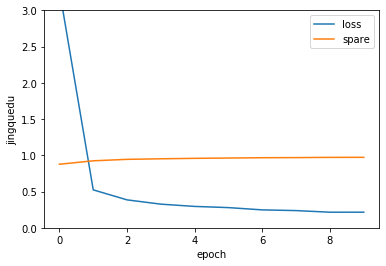

In [11]:
def plot_history(histroy):
    hist = pd.DataFrame(history.history)
    hist['epoch'] = history.epoch
    
    plt.figure
    plt.xlabel('epoch')
    plt.ylabel('jingquedu')
    
    plt.plot(hist['epoch'],hist['loss'],label = 'loss')
    plt.plot(hist['epoch'],hist['sparse_categorical_accuracy'],label='spare')
    
    plt.ylim([0,3])
    plt.legend()
    
    plt.show()
    
plot_history(history)

In [15]:
result = model.predict(test_dataset)

In [33]:
def print_result(pre):
    print(result[pre])
    return np.argmax(result[pre]),test_labels[pre]
    
pred,la = print_result(67)
pred
la

[0. 0. 0. 0. 1. 0. 0. 0. 0. 0.]


4

4